In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier     
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# EDA

In [3]:
df = pd.read_csv("crop_recommendation.csv", sep = ';')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: >

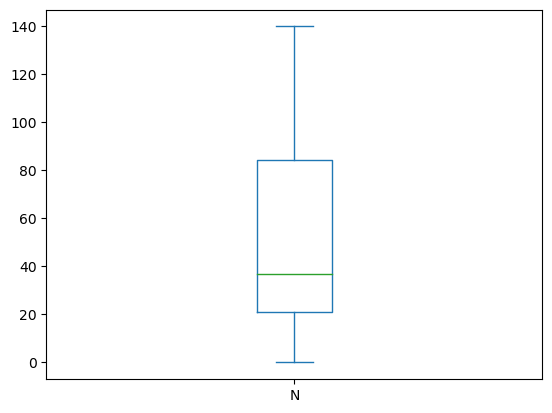

In [8]:
df['N'].plot(kind = "box")

<Axes: >

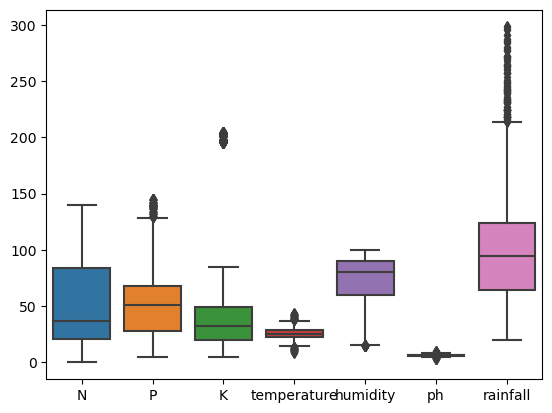

In [9]:
sns.boxplot(df)

<Axes: xlabel='N', ylabel='Density'>

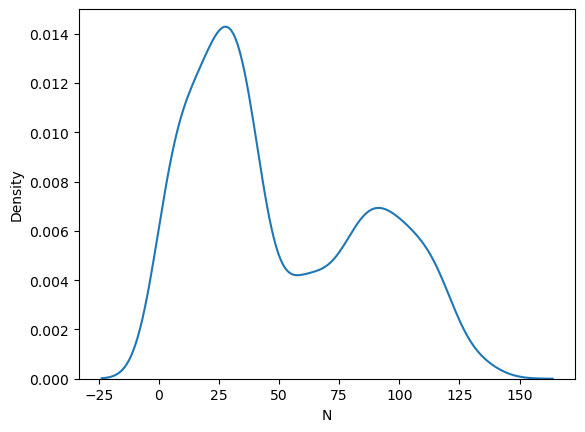

In [10]:
sns.kdeplot(df["N"])

<Axes: xlabel='P', ylabel='Density'>

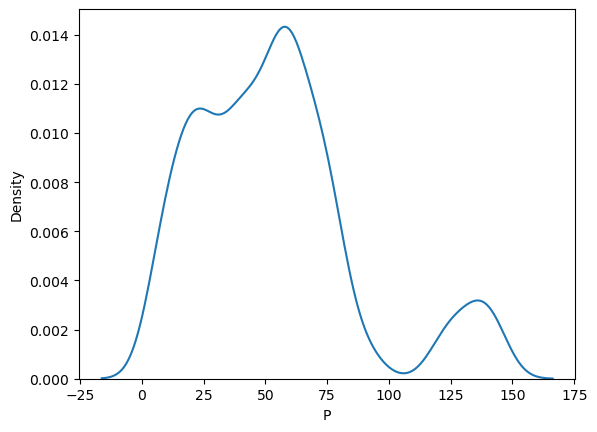

In [11]:
sns.kdeplot(df["P"])

<Axes: xlabel='K', ylabel='Density'>

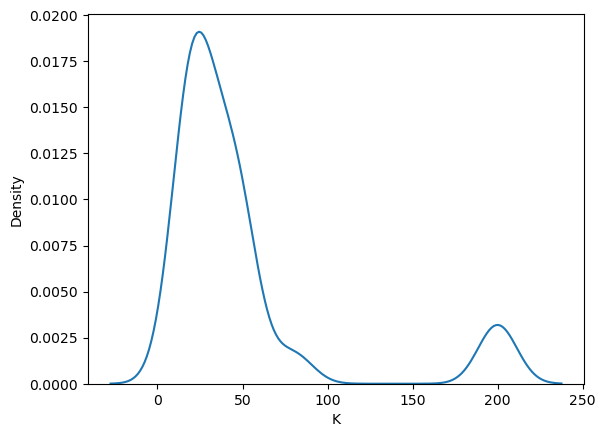

In [12]:
sns.kdeplot(df["K"])

In [13]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<Axes: xlabel='temperature', ylabel='Density'>

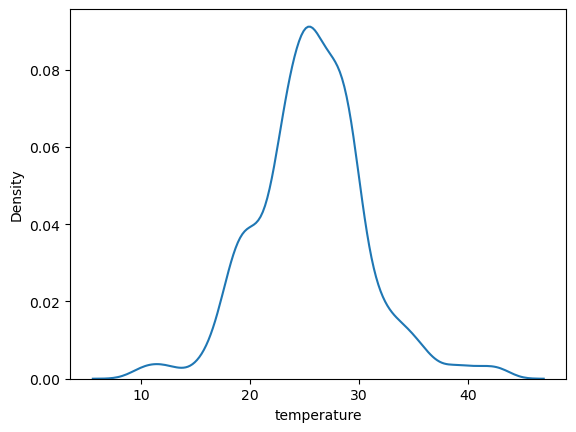

In [14]:
sns.kdeplot(df['temperature'])

<Axes: xlabel='humidity', ylabel='Density'>

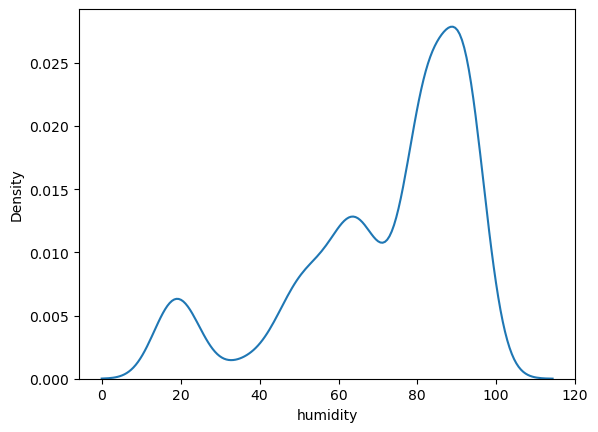

In [15]:
sns.kdeplot(df['humidity'])

<Axes: xlabel='ph', ylabel='Density'>

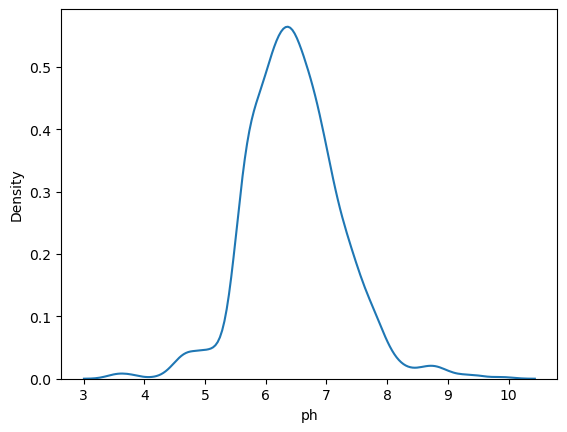

In [16]:
\sns.kdeplot(df['ph'])

<Axes: xlabel='rainfall', ylabel='Density'>

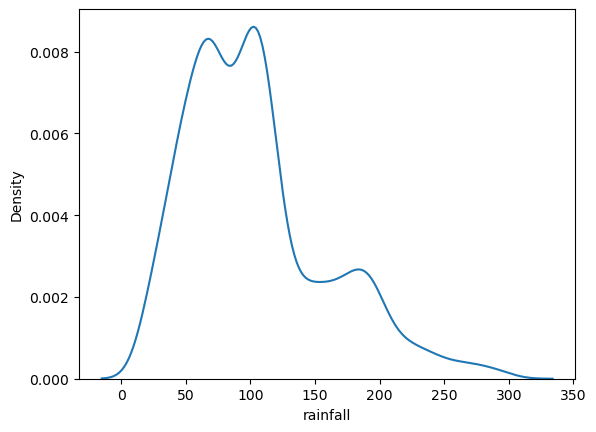

In [17]:
sns.kdeplot(df['rainfall'])

In [25]:
crop_mapping = {
    "mungbean": "beans",
    "chickpea": "groundnut",
    "grapes": "cashew",
    "apple": "African Star Apple",
    "papaya": "pawpaw",
    "pigeonpeas": "cowpea",
    "blackgram": "soybean",
    "lentil": "millet",
    "jute": "okra",
    "cotton": "yam",
    "coffee": "cassava", 
    "kidneybeans":"sorghum",
    "mothbeans":"plantain",
    "muskmelon" :"pepper",
    "pomegranate":"tomato"}

In [27]:
df["label"] = df["label"].replace(crop_mapping)

In [29]:
df.to_csv("Crop_recommendation_nigeria.csv", index=False)

In [31]:
 print(df["label"].unique())

['rice' 'maize' 'groundnut' 'sorghum' 'cowpea' 'plantain' 'beans'
 'soybean' 'millet' 'tomato' 'banana' 'mango' 'cashew' 'watermelon'
 'pepper' 'African Star Apple' 'orange' 'pawpaw' 'coconut' 'yam' 'okra'
 'cassava']


In [33]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,cassava
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,cassava
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,cassava
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,cassava
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,cassava


In [35]:
df["label"].value_counts()

label
rice                  100
maize                 100
okra                  100
yam                   100
coconut               100
pawpaw                100
orange                100
African Star Apple    100
pepper                100
watermelon            100
cashew                100
mango                 100
banana                100
tomato                100
millet                100
soybean               100
beans                 100
plantain              100
cowpea                100
sorghum               100
groundnut             100
cassava               100
Name: count, dtype: int64

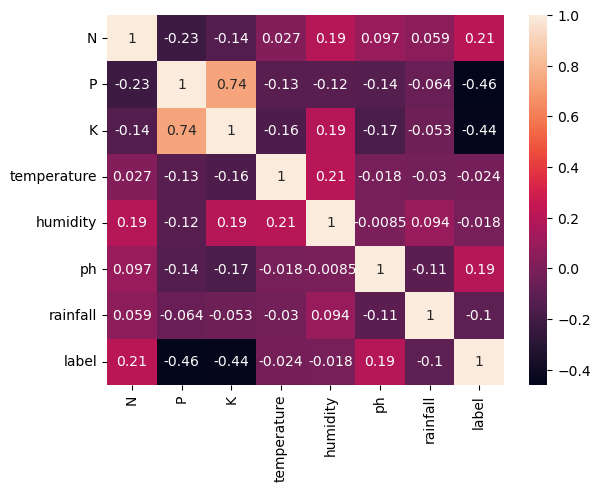

In [73]:
sns.heatmap(df.corr(), annot=True);

### MODEL

In [40]:
LE= LabelEncoder()
df["label"]=LE.fit_transform(df["label"])

In [42]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,16
1,85,58,41,21.770462,80.319644,7.038096,226.655537,16
2,60,55,44,23.004459,82.320763,7.840207,263.964248,16
3,74,35,40,26.491096,80.158363,6.980401,242.864034,16
4,78,42,42,20.130175,81.604873,7.628473,262.717340,16


In [44]:
X=df.drop("label", axis=1)
y=df["label"]

In [46]:
print("X=", X.shape)
print("y=", y.shape)

X= (2200, 7)
y= (2200,)


In [52]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,train_size=.80,shuffle=True)

In [56]:
dtc = DecisionTreeClassifier()

In [58]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = dtc.predict(X_test)

In [62]:
dtc.score(X_train,y_train)

1.0

In [64]:
accuracy_score(y_test, y_pred)

0.9886363636363636

In [66]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    sns.heatmap(cm, annot=True, cmap='Purples');
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

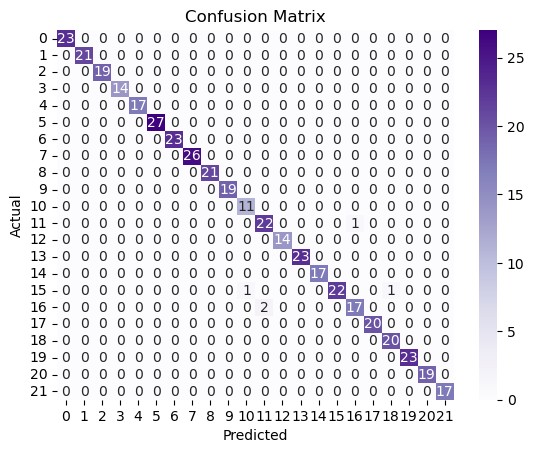

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        19
          10       0.92      1.00      0.96        11
          11       0.92      0.96      0.94        23
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        17
          15       1.00      0.92      0.96        24
          16       0.94      0.89      0.92        19
          17       1.00    

In [75]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

### DATA NORMALIZATION

In [78]:
steps = [
    ('scale', StandardScaler()), 
    ('model', DecisionTreeClassifier())]


dtc_pipeline = Pipeline(steps)

In [80]:
dtc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [84]:
y_pred = dtc_pipeline.predict(X_test)

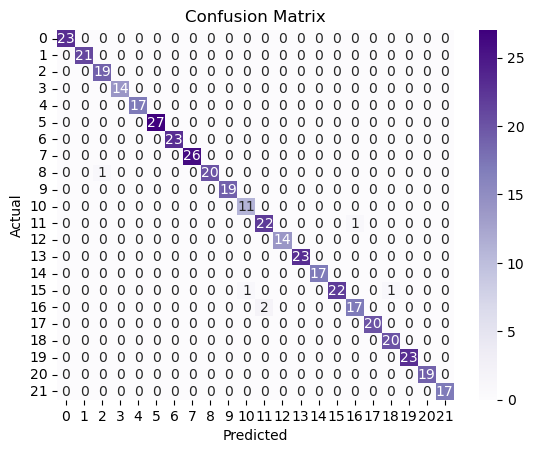

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        26
           8       1.00      0.95      0.98        21
           9       1.00      1.00      1.00        19
          10       0.92      1.00      0.96        11
          11       0.92      0.96      0.94        23
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        17
          15       1.00      0.92      0.96        24
          16       0.94      0.89      0.92        19
          17       1.00    

In [86]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

### RANDOM FOREST CLASSIFIER

In [89]:
steps = [
    ('scaler', StandardScaler()), 
    ('model', RandomForestClassifier())]


rf_pipeline = Pipeline(steps)

In [91]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [95]:
y_pred = rf_pipeline.predict(X_test)

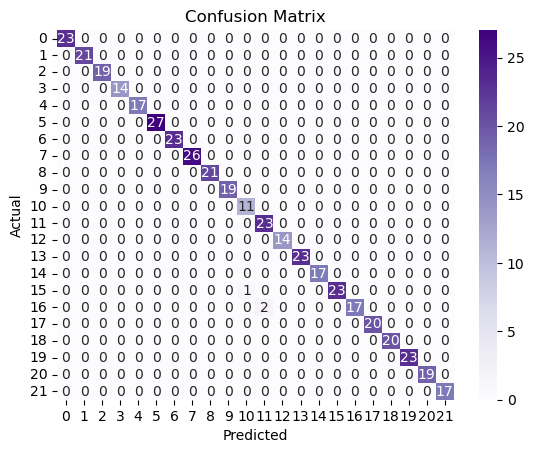

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        19
          10       0.92      1.00      0.96        11
          11       0.92      1.00      0.96        23
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        17
          15       1.00      0.96      0.98        24
          16       1.00      0.89      0.94        19
          17       1.00    

In [97]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [99]:
steps = [
    ('scaler', StandardScaler()), 
    ('model', XGBClassifier())]


xgb_pipeline = Pipeline(steps)

In [101]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [103]:
y_pred = xgb_pipeline.predict(X_test)

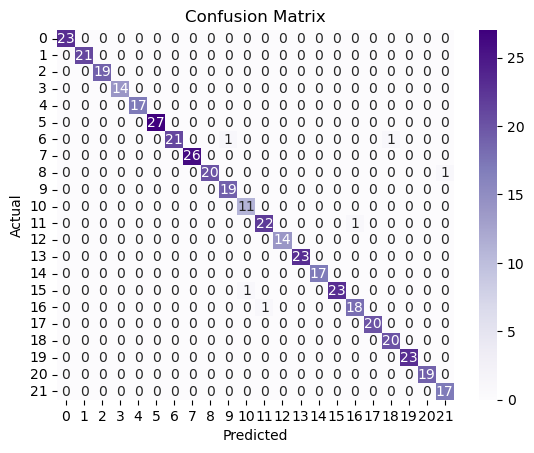

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      0.91      0.95        23
           7       1.00      1.00      1.00        26
           8       1.00      0.95      0.98        21
           9       0.95      1.00      0.97        19
          10       0.92      1.00      0.96        11
          11       0.96      0.96      0.96        23
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        17
          15       1.00      0.96      0.98        24
          16       0.95      0.95      0.95        19
          17       1.00    

In [105]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

### CROSS VALIDATION

In [108]:
rf = RandomForestClassifier()

In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", round(scores.mean(), 2))

Cross-validation scores: [0.99772727 0.99318182 0.99772727 0.99545455 0.98863636]
Mean accuracy: 0.99


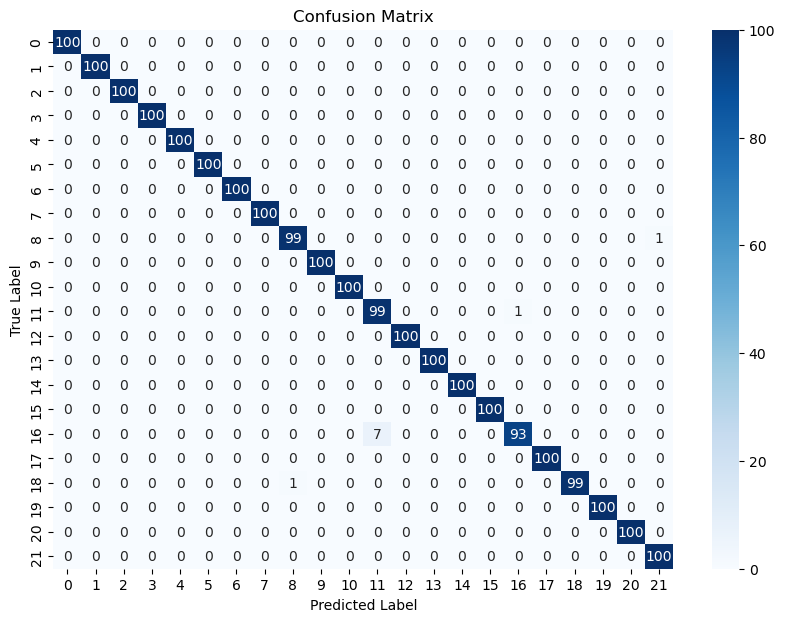

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100
           5       1.00      1.00      1.00       100
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00       100
           8       0.99      0.99      0.99       100
           9       1.00      1.00      1.00       100
          10       1.00      1.00      1.00       100
          11       0.93      0.99      0.96       100
          12       1.00      1.00      1.00       100
          13       1.00      1.00      1.00       100
          14       1.00      1.00      1.00       100
          15       1.00      1.00      1.00       100
          16       0.99      0.93      0.96       100
   

In [119]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf, X, y, cv=skf)

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:\n", classification_report(y, y_pred))


In [123]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')

print("Scores:", scores)
print("Average Accuracy:", scores.mean())

Scores: [0.99545455 0.99545455 0.99772727 0.99772727 0.99090909]
Average Accuracy: 0.9954545454545455


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [135]:
from sklearn.pipeline import make_pipeline

models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000)),
    "SVM": make_pipeline(StandardScaler(), SVC()),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGB": XGBClassifier()}


metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

results = []

for name, model in models.items():
    row = {"Model": name}
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
        row[metric] = np.mean(scores)
    results.append(row) 

results_df = pd.DataFrame(results)

print("\nCross-Validation Results (mean scores):")
print(results_df)

best_models = {}
for metric in metrics:
    best_idx = results_df[metric].idxmax()
    best_models[metric] = (results_df.loc[best_idx, "Model"], results_df.loc[best_idx, metric])

print("\nBest models by metric:")
for metric, (model, score) in best_models.items():
    print(f"  {metric}: {model} ({score:.4f})")


Cross-Validation Results (mean scores):
                 Model  accuracy  precision_macro  recall_macro  f1_macro
0  Logistic Regression  0.970909         0.972138      0.970909  0.970725
1                  SVM  0.983636         0.985667      0.983636  0.983556
2                  KNN  0.974545         0.977266      0.974545  0.974431
3        Random Forest  0.995000         0.996222      0.995000  0.995447
4        Decision Tree  0.988636         0.987796      0.985455  0.987260
5                  XGB  0.992727         0.993035      0.992727  0.992718

Best models by metric:
  accuracy: Random Forest (0.9950)
  precision_macro: Random Forest (0.9962)
  recall_macro: Random Forest (0.9950)
  f1_macro: Random Forest (0.9954)


In [137]:
import joblib

best_model = models["Random Forest"]   

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

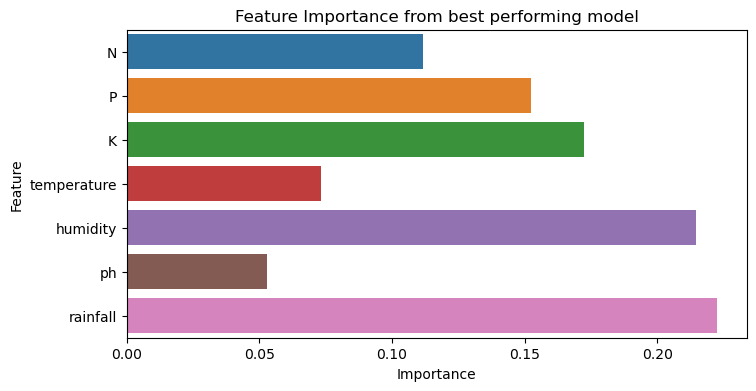

In [149]:
feature_names = X.columns
importances = best_model.feature_importances_

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from best performing model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

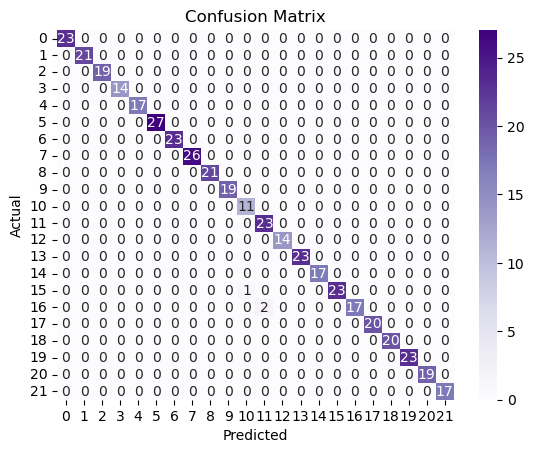

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        19
          10       0.92      1.00      0.96        11
          11       0.92      1.00      0.96        23
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        17
          15       1.00      0.96      0.98        24
          16       1.00      0.89      0.94        19
          17       1.00    

In [139]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [141]:
joblib.dump(best_model, "best_model.joblib")

['best_model.joblib']

In [155]:
import pickle
with open("LE.pkl", "wb") as f:
    pickle.dump(LE, f)

In [161]:
import joblib
import json

# Load your trained label encoder
le = joblib.load(r"C:\Users\Alfa\OneDrive\AI CLASS\PROJECT\Crop_Recommendation_Streamlit\LE.pkl")  # if you saved it earlier

# Get mapping
crop_mapping = {i: crop for i, crop in enumerate(le.classes_)}

# Save mapping to json
with open("crop_mapping.json", "w") as f:
    json.dump(crop_mapping, f)

In [165]:
print("Classes (labels):", LE.classes_)
print("Number of classes:", len(LE.classes_))

# Map each class to its encoded number
mapping = {i: label for i, label in enumerate(LE.classes_)}
print("Encoding mapping:", mapping)

Classes (labels): ['African Star Apple' 'banana' 'beans' 'cashew' 'cassava' 'coconut'
 'cowpea' 'groundnut' 'maize' 'mango' 'millet' 'okra' 'orange' 'pawpaw'
 'pepper' 'plantain' 'rice' 'sorghum' 'soybean' 'tomato' 'watermelon'
 'yam']
Number of classes: 22
Encoding mapping: {0: 'African Star Apple', 1: 'banana', 2: 'beans', 3: 'cashew', 4: 'cassava', 5: 'coconut', 6: 'cowpea', 7: 'groundnut', 8: 'maize', 9: 'mango', 10: 'millet', 11: 'okra', 12: 'orange', 13: 'pawpaw', 14: 'pepper', 15: 'plantain', 16: 'rice', 17: 'sorghum', 18: 'soybean', 19: 'tomato', 20: 'watermelon', 21: 'yam'}


In [171]:
print(X_train.describe())


                 N            P            K  temperature     humidity  \
count  1760.000000  1760.000000  1760.000000  1760.000000  1760.000000   
mean     50.686364    53.409659    48.136364    25.579640    71.559997   
std      37.297925    33.228169    51.078128     5.090070    22.024009   
min       0.000000     5.000000     5.000000     8.825675    14.273280   
25%      20.000000    28.000000    20.000000    22.756264    60.280638   
50%      37.000000    51.000000    31.000000    25.596201    80.511845   
75%      85.000000    68.000000    48.000000    28.523840    89.902572   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  1760.000000  1760.000000  
mean      6.475940   102.661255  
std       0.773445    54.951994  
min       3.504752    20.360011  
25%       5.964518    64.092956  
50%       6.433084    94.304074  
75%       6.927832   122.477114  
max       9.935091   298.560117  
